In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
ds = pd.read_csv('/kaggle/input/water-consumption-in-saudi-arabia-cities/SAMA_StatisticalReport_2025 - (1).csv')

In [3]:
ds.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Period,Makkah,AL-Madinah_AL-Munawwarah,Riyadh,Eastern_Province,Asir,Al-Qasim,Tabuk,Hail,Northern_border_region,Al-Jouf,Al-Baha,Najran,Jizan
0,2007/2008,356566.1,132416.3,513655.9,41572.3,41799.8,115657.6,421689.6,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/2009,367307.2,132416.3,513655.9,417998.2,41572.3,115657.6,53538.8,NaN,NaN,NaN,NaN,NaN,NaN
2,2009/2010,428233.1,149832.5,516067.8,447730.3,45833.8,119920.6,59651.6,NaN,NaN,NaN,NaN,NaN,NaN
3,2010/2011,619770.0,170273.0,722615.0,491881.0,47778.0,141800.0,64032.0,29547.6,16787.0,38373.4,9064.8,9888.5,17369.5
4,2011/2012,613350.3,154468.3,748120.7,554123.8,62662.2,116574.4,56406.0,25592.0,17081.4,39658.2,9473.1,9114.4,16689.3


In [4]:
ds.describe()

,Makkah,AL-Madinah_AL-Munawwarah,Riyadh,Eastern_Province,Asir,Al-Qasim,Tabuk,Hail,Northern_border_region,Al-Jouf,Al-Baha,Najran,Jizan
count,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,656416.966733,188782.303733,8.628165e+05,560079.438733,78585.709800,132525.860200,93444.746733,49238.342333,26511.496833,43340.200917,27984.826667,22415.850167,62893.577167
std,159253.096417,44498.745174,2.281607e+05,167101.690219,26257.940018,30938.234199,92149.717928,17033.912677,7323.620833,7528.732050,12815.633932,9026.384876,34702.662528
min,356566.100000,132416.300000,5.136559e+05,41572.300000,41572.300000,64505.027000,52331.257000,25283.141000,16787.000000,27590.603000,9064.800000,9114.400000,16689.300000
25%,616560.150000,157708.323500,7.353678e+05,523002.400000,55220.100000,116882.515500,58107.857500,31551.040500,22327.180250,40095.456000,15489.430000,16905.383750,36807.190500
50%,699180.000000,178006.528000,8.698403e+05,612784.265000,79353.946000,123198.349000,70420.622000,55700.582500,24965.316500,41646.444000,32710.218500,23652.065500,59383.909000
75%,767489.401000,220064.483000,1.074912e+06,659586.493000,101143.713000,154472.719000,73379.291500,64588.927000,30691.262000,47878.666000,38177.655750,30536.823000,87356.961250
max,841414.236000,261164.168000,1.126030e+06,685524.588000,116602.110000,180110.430000,421689.600000,69538.902000,38874.146000,56661.558000,43194.788000,33357.240000,119701.885000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period                    15 non-null     object 
 1   Makkah                    15 non-null     float64
 2   AL-Madinah_AL-Munawwarah  15 non-null     float64
 3   Riyadh                    15 non-null     float64
 4   Eastern_Province          15 non-null     float64
 5   Asir                      15 non-null     float64
 6   Al-Qasim                  15 non-null     float64
 7   Tabuk                     15 non-null     float64
 8   Hail                      12 non-null     float64
 9   Northern_border_region    12 non-null     float64
 10  Al-Jouf                   12 non-null     float64
 11  Al-Baha                   12 non-null     float64
 12  Najran                    12 non-null     float64
 13  Jizan                     12 non-null     float64
dtypes: float64(1

In [6]:
ds.shape

(15, 14)

In [7]:
ds.isnull().sum()

Period                      0
Makkah                      0
AL-Madinah_AL-Munawwarah    0
Riyadh                      0
Eastern_Province            0
Asir                        0
Al-Qasim                    0
Tabuk                       0
Hail                        3
Northern_border_region      3
Al-Jouf                     3
Al-Baha                     3
Najran                      3
Jizan                       3
dtype: int64

In [8]:
ds.columns

Index(['Period', 'Makkah', 'AL-Madinah_AL-Munawwarah', 'Riyadh',
       'Eastern_Province', 'Asir', 'Al-Qasim', 'Tabuk', 'Hail',
       'Northern_border_region', 'Al-Jouf', 'Al-Baha', 'Najran', 'Jizan'],
      dtype='object')

In [9]:
null_columns = ['Hail', 'Northern_border_region', 'Al-Jouf', 'Al-Baha', 'Najran', 'Jizan']

In [10]:
for col in null_columns:
    if ds[col].isnull().any():
        # Fill index 1 with the smallest number in the column (excluding NaN)
        smallest_value = ds[col].min(skipna=True)
        ds.loc[1, col] = smallest_value

        # Backfill index 0 and 2 with the existing method
        ds[col] = ds[col].fillna(method='bfill')

<ipython-input-10-be2dfd933f67>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds[col] = ds[col].fillna(method='bfill')
<ipython-input-10-be2dfd933f67>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds[col] = ds[col].fillna(method='bfill')
<ipython-input-10-be2dfd933f67>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds[col] = ds[col].fillna(method='bfill')
<ipython-input-10-be2dfd933f67>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds[col] = ds[col].fillna(method='bfill')
<ipython-input-10-be2dfd933f67>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill

In [11]:
ds.head()

,Period,Makkah,AL-Madinah_AL-Munawwarah,Riyadh,Eastern_Province,Asir,Al-Qasim,Tabuk,Hail,Northern_border_region,Al-Jouf,Al-Baha,Najran,Jizan
0,2007/2008,356566.1,132416.3,513655.9,41572.3,41799.8,115657.6,421689.6,25283.141,16787.0,27590.603,9064.8,9114.4,16689.3
1,2008/2009,367307.2,132416.3,513655.9,417998.2,41572.3,115657.6,53538.8,25283.141,16787.0,27590.603,9064.8,9114.4,16689.3
2,2009/2010,428233.1,149832.5,516067.8,447730.3,45833.8,119920.6,59651.6,29547.600,16787.0,38373.400,9064.8,9888.5,17369.5
3,2010/2011,619770.0,170273.0,722615.0,491881.0,47778.0,141800.0,64032.0,29547.600,16787.0,38373.400,9064.8,9888.5,17369.5
4,2011/2012,613350.3,154468.3,748120.7,554123.8,62662.2,116574.4,56406.0,25592.000,17081.4,39658.200,9473.1,9114.4,16689.3


In [12]:
all_columns = ds.columns[1:]

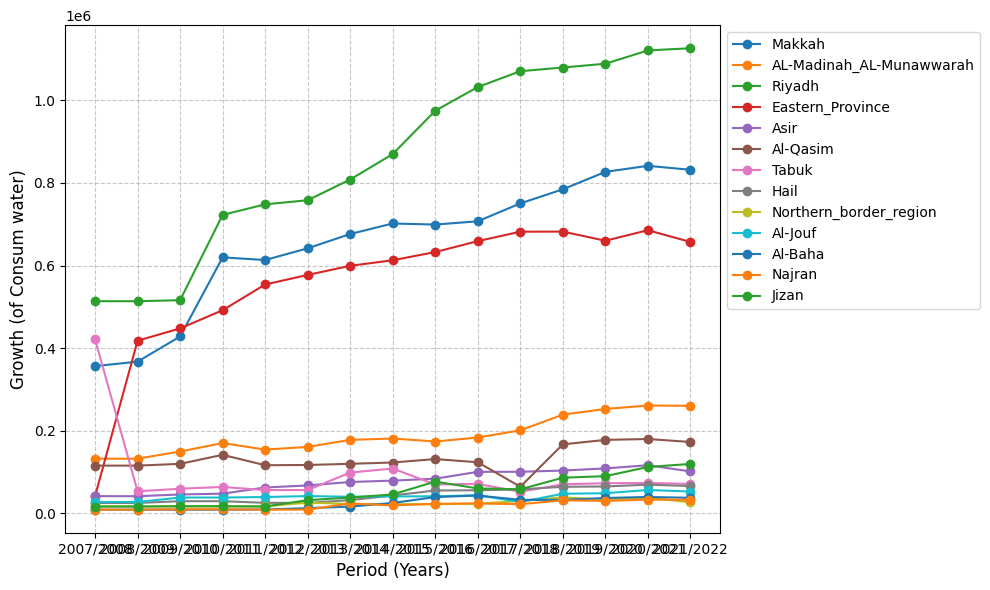

In [13]:
plt.figure(figsize=(10, 6))
for column in ds.columns:
    if column != 'Period':
        plt.plot(ds['Period'], ds[column], marker='o', label=column)

plt.xlabel('Period (Years)', fontsize=12)
plt.ylabel('Growth (of Consum water)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

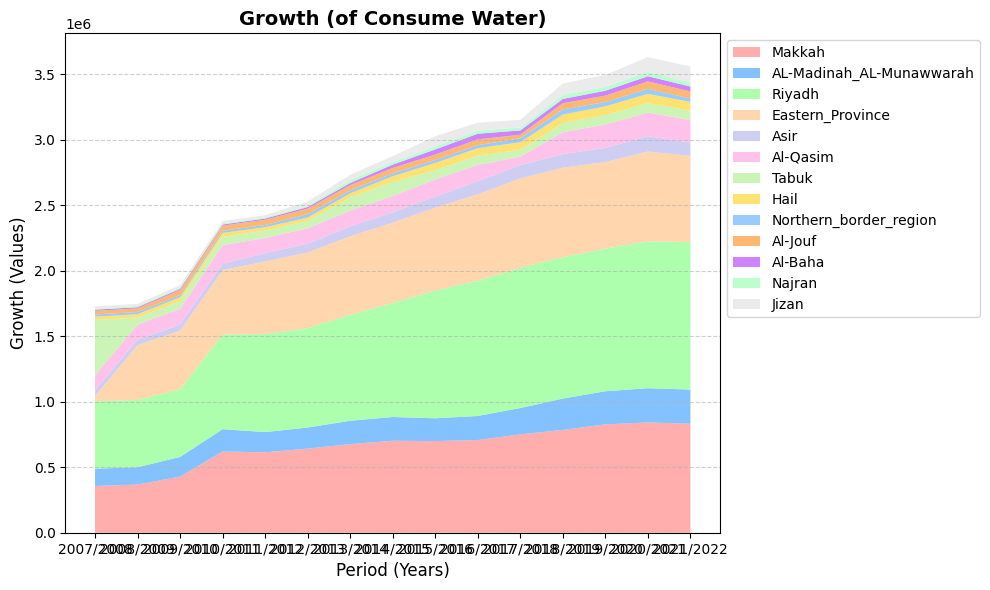

In [14]:
colors = [
    '#ff9999',  # Light Red
    '#66b3ff',  # Light Blue
    '#99ff99',  # Light Green
    '#ffcc99',  # Light Orange
    '#c2c2f0',  # Lavender
    '#ffb3e6',  # Pink
    '#c0f2a4',  # Lime Green
    '#ffdb4d',  # Yellow
    '#80bfff',  # Sky Blue
    '#ffa64d',  # Orange
    '#c266ff',  # Purple
    '#aaffc3',  # Mint
    '#e6e6e6'   # Light Gray
]

# Stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(
    ds['Period'],
    [ds[col] for col in ds.columns if col != 'Period'],
    labels=[col for col in ds.columns if col != 'Period'],
    colors=colors,  # Use custom colors
    alpha=0.8
)

plt.xlabel('Period (Years)', fontsize=12)
plt.ylabel('Growth (Values)', fontsize=12)
plt.title('Growth (of Consume Water)', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a subtle grid for clarity
plt.tight_layout()
plt.show()

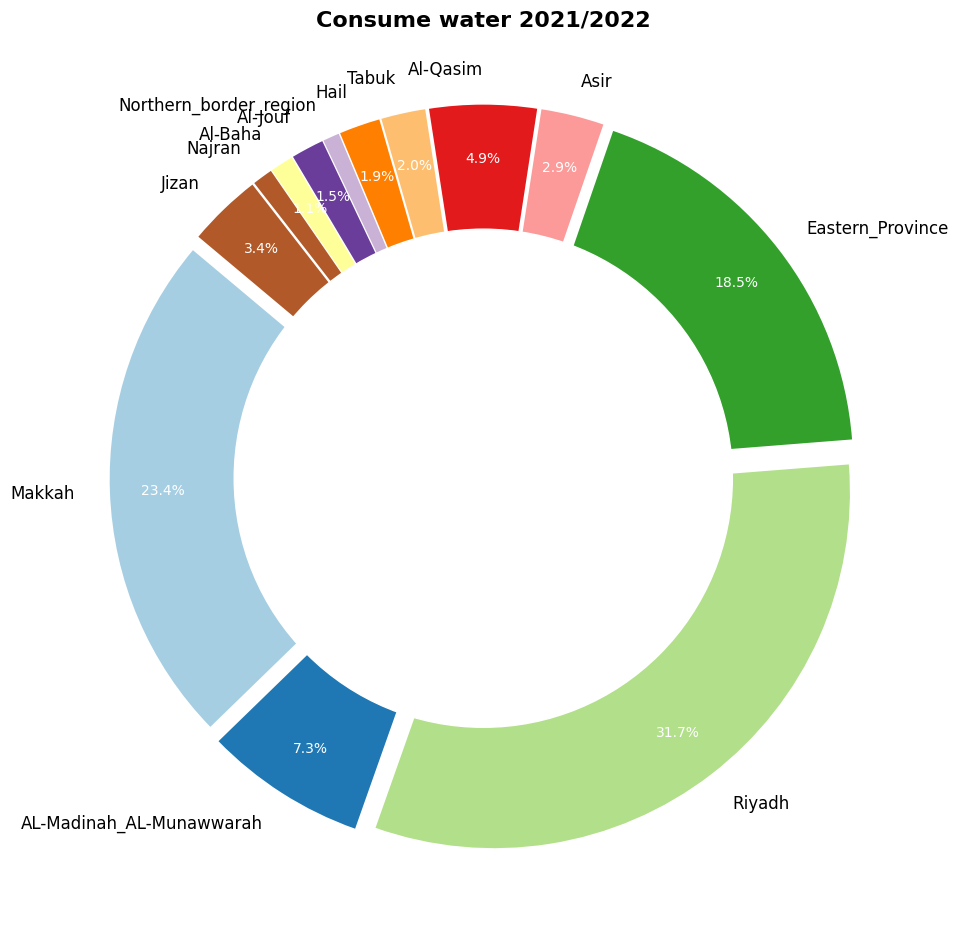

In [15]:
year_index = -1  # Last year in the dataset
data_for_pie = ds.iloc[year_index, 1:]  # Exclude 'Period'

# Explode smaller values for clarity
explode = [0.1 if value < 5 else 0.05 for value in data_for_pie.values]

# Custom color palette
colors = plt.cm.Paired(range(len(data_for_pie)))

# Fancy Plot
plt.figure(figsize=(10, 10))  # Adjust size
wedges, texts, autotexts = plt.pie(
    data_for_pie,
    labels=data_for_pie.index,
    autopct=lambda p: f'{p:.1f}%' if p > 1 else '',  # Show >1% only
    startangle=140,
    explode=explode,
    colors=colors,
    pctdistance=0.85,  # Push % inside for a donut effect
    textprops={'fontsize': 12, 'color': 'black'},  # Font styling for labels
)

# Donut hole for aesthetic
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white', zorder=1))

# Title and formatting
plt.title(f"Consume water {ds['Period'].iloc[year_index]}", fontsize=16, fontweight='bold')
plt.tight_layout()

# Styling autotexts
for autotext in autotexts:
    autotext.set_color('white')  # Percentage text color
    autotext.set_fontsize(10)    # Percentage font size

plt.show()